## I'm learning how to import matlab data into python so I can use ipython/jupyter notebooks for some of my analysis. I think the notebooks are a better way of sharing analyses and code, and they render automatically on github. 

In [2]:
# import libraries
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next i'll try loading in a single profile from EQ14. Note the arguments in the call to sio.loadmat. Using these arguments lets us access the data similar to a matlab structure (which is what a lot of my data is in).

In [3]:
# Try loading a single profile from EQ14
fmax=7
z_smooth=10
cnum='0004'
fname1 = '/Users/Andy/Cruises_Research/ChiPod/Cham_Eq14_Compare/Data/Cham_proc_AP/chipod_method_bin/'
fname2 = 'zsm' + str(z_smooth) + 'm_fmax' + str(fmax) + 'Hz_respcorr0_fc_99hz_gamma20_nfft_128/EQ14_' + cnum + '_avg.mat'
fname=fname1+fname2
test = sio.loadmat(fname,squeeze_me=True,struct_as_record=False)

Loading it this way gives a dictionary.

In [4]:
type(test)

dict

The matlab file contained the data in a matlab structure called 'avg'. We see that this is one of the keys of the dictionary, along with some of the matlab file info.

In [5]:
test.keys()

['__version__', 'avg', '__header__', '__globals__']

Note that 'avg' is a 'mat_struct' data type, which lets us access it's fields with dot notation similar to a matlab structure.

In [6]:
x = test['avg']
type(x)

scipy.io.matlab.mio5_params.mat_struct

In [9]:
x.MakeInfo

u'Made 19-Apr-2017 15:43:43 w/ ComputeChi_Chameleon_Eq14.m'

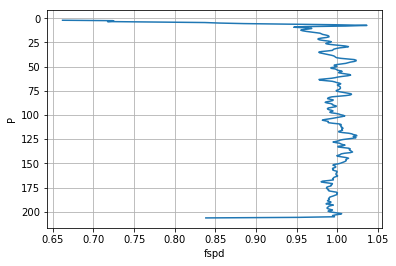

In [99]:
# okay lets try plotting now!
plt.plot(x.fspd,x.P)
plt.xlabel('fspd')
plt.ylabel('P')
plt.gca().invert_yaxis()
plt.grid()
#plt.show()

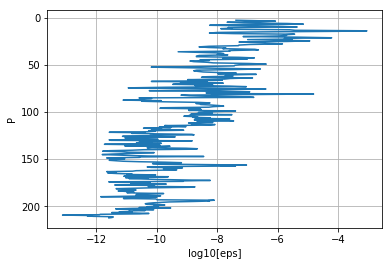

In [9]:
plt.plot( np.log10(x.eps1),x.P)
plt.xlabel('log10[eps]')
plt.ylabel('P')
plt.gca().invert_yaxis()
plt.grid()

In [13]:
# lets try loading a file w/ many profiles and making a p-color like plot
fpath = '/Users/Andy/Cruises_Research/ChiPod/Cham_Eq14_Compare/Data/chameleon/processed/Cstar=0_032/sum/'
fname = 'eq14_sum_clean.mat'
dat = sio.loadmat(fpath+fname,squeeze_me=True,struct_as_record=False)

In [17]:
dat.keys()

['__version__', 'cham', '__header__', '__globals__']

In [18]:
cham=dat['cham']

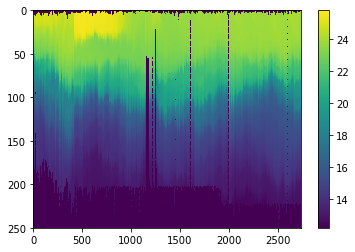

In [33]:
plt.pcolormesh(cham.T1)
plt.colorbar()
plt.clim(np.nanmin(cham.T1),np.nanmax(cham.T1))
plt.gca().invert_yaxis()

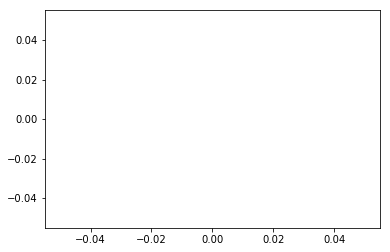

In [42]:
plt.pcolor(cham.castnumber,cham.P[:,1],cham.T1)
#plt.colorbar()
#plt.clim(np.nanmin(cham.T1),np.nanmax(cham.T1))
#plt.gca().invert_yaxis()

In [39]:
cham.castnumber

array([   4,    6,    7, ..., 3089, 3090, 3091], dtype=uint16)

In [44]:
type(cham.P)

numpy.ndarray

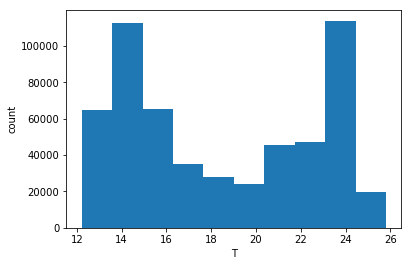

In [67]:
# try plotting histogram of cham data
b=np.reshape(cham.T1,np.size(cham.T1))
b=b[~np.isnan(b)]
plt.hist(b)
plt.xlabel('T')
plt.ylabel('count')

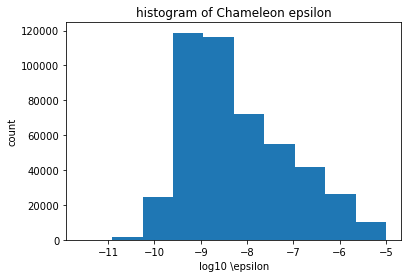

In [74]:
b=np.reshape(cham.EPSILON,np.size(cham.EPSILON))
b=b[~np.isnan(b)]
plt.hist(np.log10(b))
plt.xlabel('log10 \epsilon')
plt.ylabel('count')
plt.title('histogram of Chameleon epsilon')
